In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


**LOADING THE DATASET**


In [2]:
df=pd.read_csv('/content/List of Countries by Sugarcane Production.csv')
df.head()


,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


**UNDERSTANDING THE DATASET**


In [3]:
df.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)'],
      dtype='object')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [5]:
df.shape


(103, 7)

**DATA CLEANING**


In [6]:
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')

In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df.rename(columns={'Production (Tons)':'Production_Tons','Acreage (Hectare)':'Acreage_Hectare','Yield (Kg / Hectare)':'Yield_Kg_Hectare','Production per Person (Kg)':'Production_per_Person_Kg'},inplace=True)

In [9]:
df.columns



Index(['Unnamed: 0', 'Country', 'Continent', 'Production_Tons',
       'Production_per_Person_Kg', 'Acreage_Hectare', 'Yield_Kg_Hectare'],
      dtype='object')

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [12]:

df.columns

Index(['Country', 'Continent', 'Production_Tons', 'Production_per_Person_Kg',
       'Acreage_Hectare', 'Yield_Kg_Hectare'],
      dtype='object')

**DEALING WITH NULL AND DUPLICATE VALUES**


In [13]:
df.isnull().sum()

,0
Country,0
Continent,0
Production_Tons,0
Production_per_Person_Kg,0
Acreage_Hectare,1
Yield_Kg_Hectare,1


In [14]:
df[df['Acreage_Hectare'].isnull()]

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare
99,Djibouti,Africa,53,51,NaN,NaN


In [15]:
df=df.dropna().reset_index()

In [16]:
df.isnull().sum()


,0
index,0
Country,0
Continent,0
Production_Tons,0
Production_per_Person_Kg,0
Acreage_Hectare,0
Yield_Kg_Hectare,0


In [17]:
df.head()


,index,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [18]:
df.drop('index',axis=1,inplace=True)

In [19]:
df.columns

Index(['Country', 'Continent', 'Production_Tons', 'Production_per_Person_Kg',
       'Acreage_Hectare', 'Yield_Kg_Hectare'],
      dtype='object')

In [20]:
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.nunique()


,0
Country,102
Continent,6
Production_Tons,102
Production_per_Person_Kg,101
Acreage_Hectare,101
Yield_Kg_Hectare,102


In [23]:
df=pd.read_csv('/content/List of Countries by Sugarcane Production.csv')
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df.rename(columns={'Production (Tons)':'Production_Tons','Acreage (Hectare)':'Acreage_Hectare','Yield (Kg / Hectare)':'Yield_Kg_Hectare','Production per Person (Kg)':'Production_per_Person_Kg'},inplace=True)


In [24]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [25]:
df=df.dropna().reset_index().drop('index',axis=1)

In [26]:
df.columns

Index(['Country', 'Continent', 'Production_Tons', 'Production_per_Person_Kg',
       'Acreage_Hectare', 'Yield_Kg_Hectare'],
      dtype='object')

In [27]:
df

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [28]:
df.dtypes

,0
Country,object
Continent,object
Production_Tons,object
Production_per_Person_Kg,object
Acreage_Hectare,object
Yield_Kg_Hectare,object


In [29]:
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [30]:
df.dtypes

,0
Country,object
Continent,object
Production_Tons,object
Production_per_Person_Kg,object
Acreage_Hectare,object
Yield_Kg_Hectare,object


In [31]:
df['Production_Tons']=df['Production_Tons'].astype(float)
df['Production_per_Person_Kg']=df['Production_per_Person_Kg'].astype(float)
df['Acreage_Hectare']=df['Acreage_Hectare'].astype(float)
df['Yield_Kg_Hectare']=df['Yield_Kg_Hectare'].astype(float)


In [32]:
df.head()

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


**CHECKING OUTLIERS**

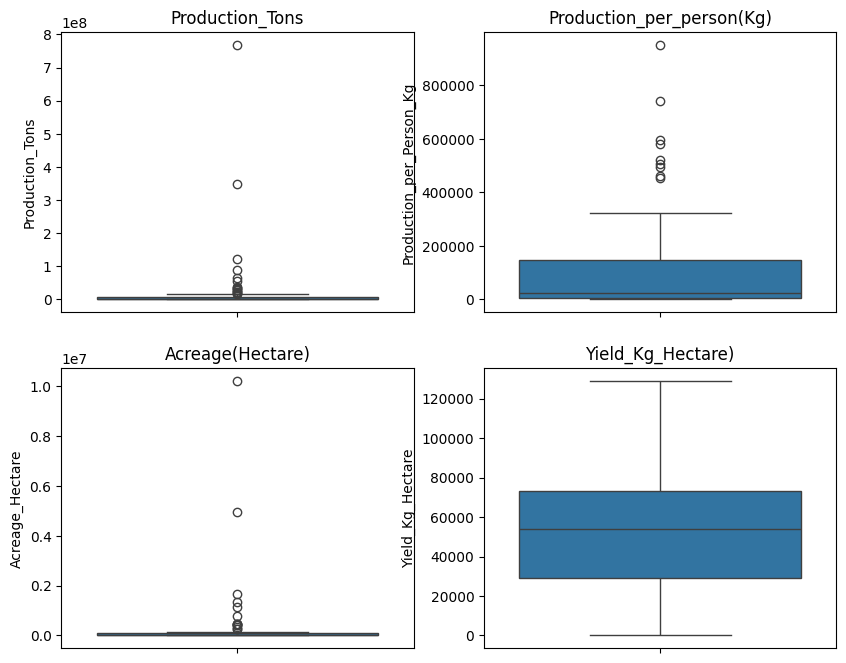

In [33]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production_Tons"])
plt.title("Production_Tons")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person_Kg"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage_Hectare"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield_Kg_Hectare"])
plt.title("Yield_Kg_Hectare)")
plt.show()


**DISTRIBUTION OF ALL NUMERIC COLUMNS**


/tmp/ipython-input-34-2501897619.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_Tons"])
/tmp/ipython-input-34-2501897619.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person_Kg"])
/tmp/ipython-input-34-2501897619.py:9: UserWarning: 

`distplot` is a d

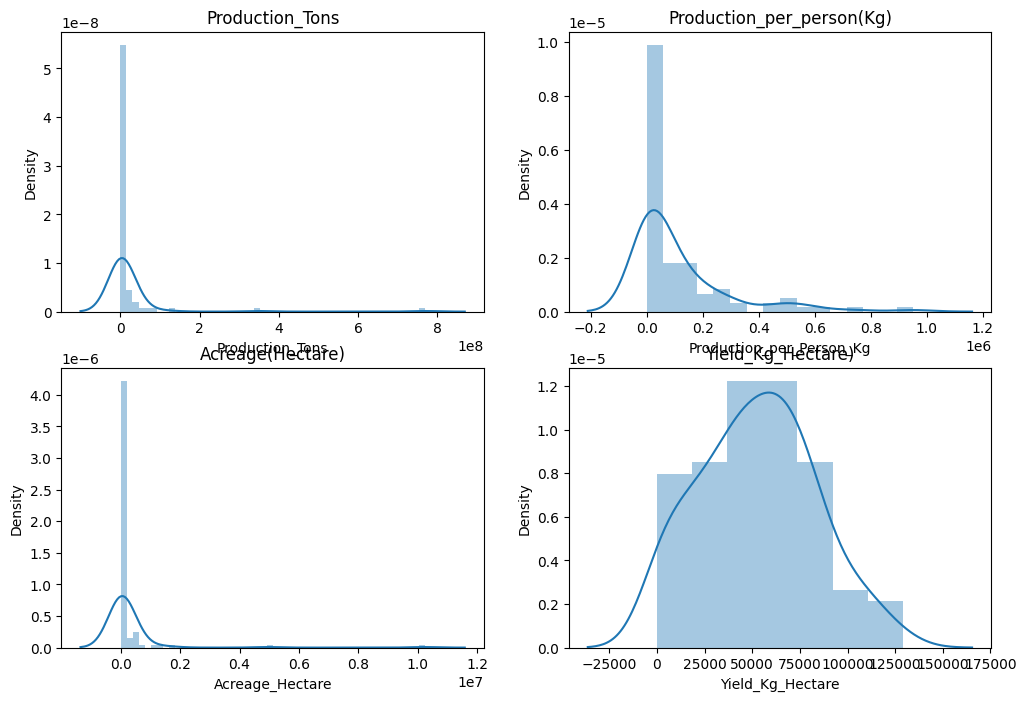

In [34]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
sns.distplot(df["Production_Tons"])
plt.title("Production_Tons")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person_Kg"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage_Hectare"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield_Kg_Hectare"])
plt.title("Yield_Kg_Hectare)")
plt.show()

**UNIVARIATE ANALYSIS**

<Axes: xlabel='Continent'>

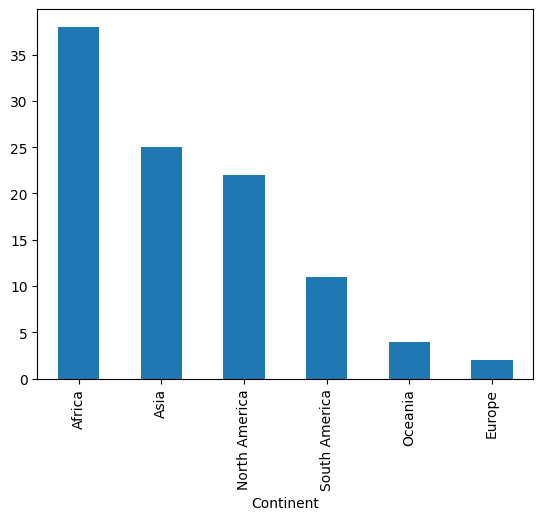

In [35]:
## The Number of Countries in each Continent
df['Continent'].value_counts().plot(kind='bar')

**Which Countries Produce the largest share of sugarcane in the world?**


<Axes: ylabel='Production_Tons'>

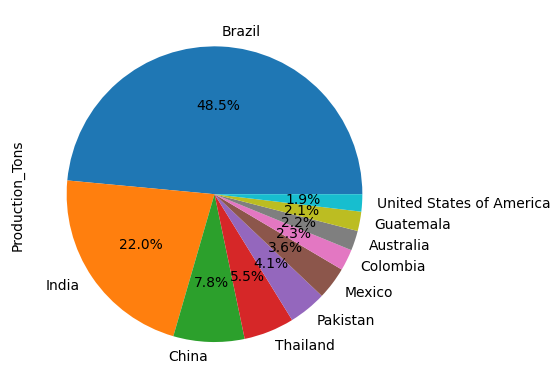

In [36]:
df_1=df[['Country','Production_Tons']].set_index('Country')
df_1['Production_Tons'].nlargest(10).plot(kind='pie',autopct='%1.1f%%')


**Brazil is the leading producer of sugarcane in the world.**

**Brazil,India and China account for around 80% of the world's total sugarcane production**

In [37]:
## Production_Percentages
df_1['Production_Percentages']=df_1['Production_Tons']/df_1['Production_Tons'].sum()*100
df_1

,Production_Tons,Production_Percentages
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production_Percentages'>

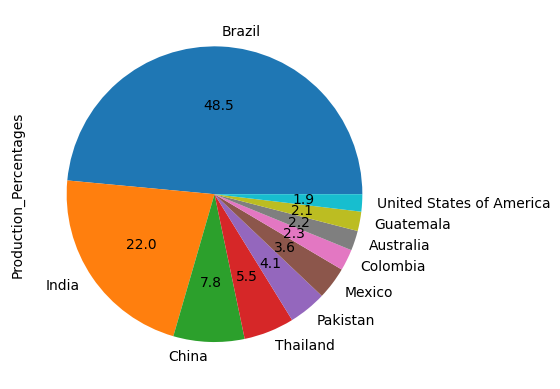

In [38]:
df_1['Production_Percentages'].nlargest(10).plot(kind='pie',autopct='%.1f')

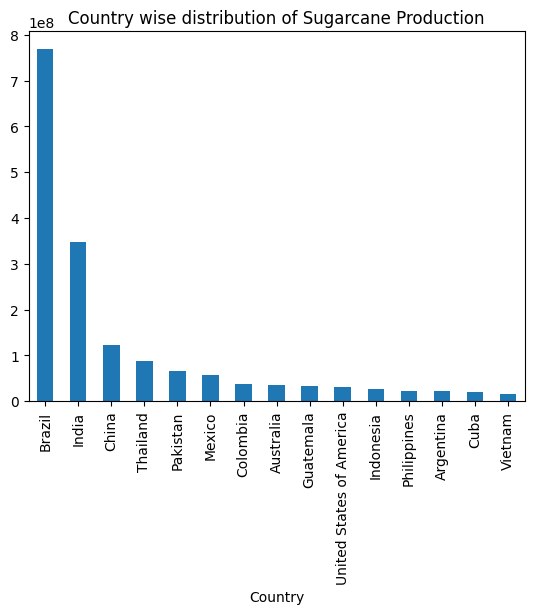

In [39]:
df_1['Production_Tons'].sort_values(ascending=False).head(15).plot(kind='bar',title='Country wise distribution of Sugarcane Production')
plt.show()

**Which country has highest yield per hectare?**

In [40]:
df_yield=df.sort_values(by= 'Yield_Kg_Hectare',ascending=False).head(15)
df_yield

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare
8,Guatemala,North America,33533403.0,1938.114,25985.0,129049.3
57,Senegal,Africa,696992.0,44321.000,5902.0,118085.3
15,Egypt,Africa,15760418.0,161651.000,137011.0,115030.6
18,Peru,South America,9832526.0,314768.000,87696.0,112120.2
40,Malawi,Africa,2915406.0,162584.000,27087.0,107629.5
62,Chad,Africa,455986.0,297.000,4433.0,102867.1
31,Zambia,Africa,4285839.0,253784.000,41695.0,102789.6
61,Burkina Faso,Africa,484872.0,23951.000,4823.0,100526.3
26,Swaziland,Africa,5583295.0,4816.299,57851.0,96511.4
24,Nicaragua,North America,6815147.0,1084.393,7413.0,91935.1


In [41]:
df_2=df[['Country','Yield_Kg_Hectare']].sort_values(by='Yield_Kg_Hectare',ascending=False).head(15).set_index('Country')
df_2

,Yield_Kg_Hectare
Country,
Guatemala,129049.3
Senegal,118085.3
Egypt,115030.6
Peru,112120.2
Malawi,107629.5
Chad,102867.1
Zambia,102789.6
Burkina Faso,100526.3
Swaziland,96511.4


<Axes: title={'center': 'Countries having highest yield per hectare'}, xlabel='Country'>

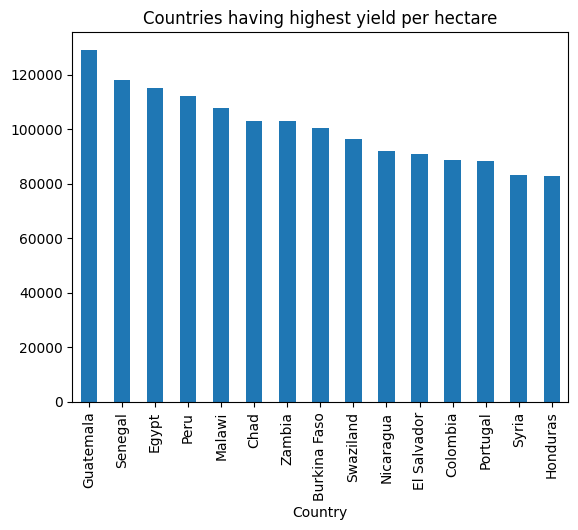

In [42]:
df_2['Yield_Kg_Hectare'].plot(kind='bar',title='Countries having highest yield per hectare')

**Guatemala has the highest yield per hectare**


**COUNTRIES HAVING THE LARGEST LAND**


/tmp/ipython-input-43-2684314949.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


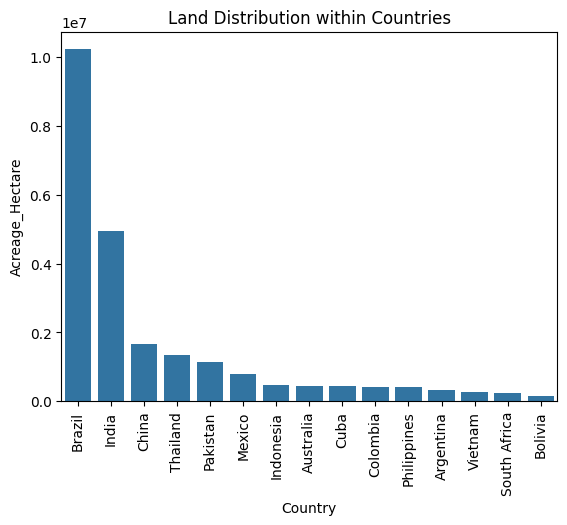

In [43]:
df_acr = df.sort_values("Acreage_Hectare", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage_Hectare")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.title('Land Distribution within Countries')
plt.show()

**Brazil has the largest portion of land hence it has highest contribution in the world's total sugarcane production**


In [44]:
df_3=df.sort_values(by='Production_per_Person_Kg',ascending=False)
df_3.head(10)

,Country,Continent,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare
25,Paraguay,South America,6708000.0,951087.0,120.0,559.0
6,Colombia,South America,36951213.0,740075.0,416626.0,88691.5
55,Trinidad and Tobago,North America,810.0,597066.0,15.0,54.0
42,Panama,North America,2419638.0,581814.0,37995.0,63683.1
51,Jamaica,North America,1422432.0,521254.0,26255.0,54178.2
19,Ecuador,South America,8661609.0,507518.0,104661.0,82758.4
12,Argentina,South America,21990823.0,494237.0,331699.0,66297.5
29,Dominican Republic,North America,4717490.0,459519.0,10681.0,44167.0
5,Mexico,North America,56446821.0,452524.0,781054.0,7227.0
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


/tmp/ipython-input-45-3070984496.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


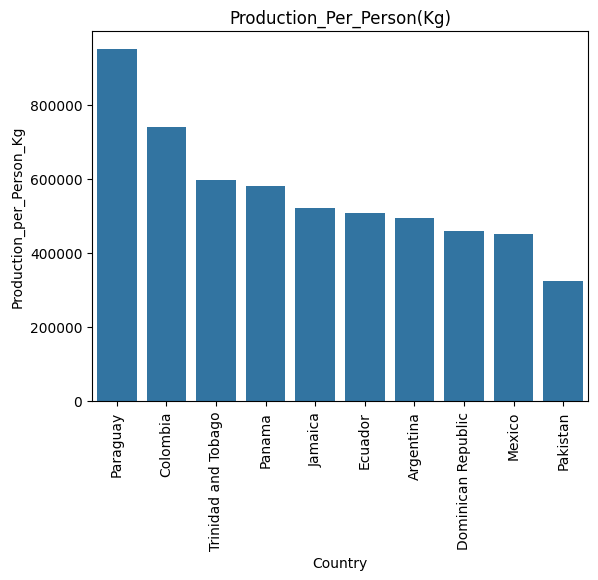

In [45]:
ax=sns.barplot(data=df_3.head(10),x='Country',y='Production_per_Person_Kg')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.title('Production_Per_Person(Kg)')
plt.show()

**Paraguay has the highest production per person.**


In [46]:
df.groupby('Continent').size()


,0
Continent,
Africa,38
Asia,25
Europe,2
North America,22
Oceania,4
South America,11


In [47]:
df_continent = df.groupby("Continent").sum()
df_continent

,Country,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


In [48]:
del df_continent['Country']

In [49]:
df_continent['number_of_countries']=df.groupby('Continent').size()
df_continent

,Production_Tons,Production_per_Person_Kg,Acreage_Hectare,Yield_Kg_Hectare,number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


<Axes: ylabel='Production_Tons'>

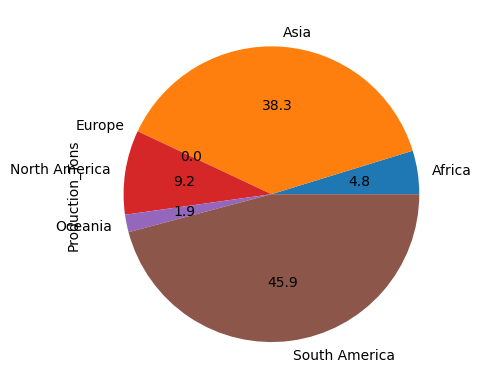

In [50]:
df_continent['Production_Tons'].plot(kind='pie',autopct='%.1f')

**The continent South America is the leading producer of Sugarcane in the world**

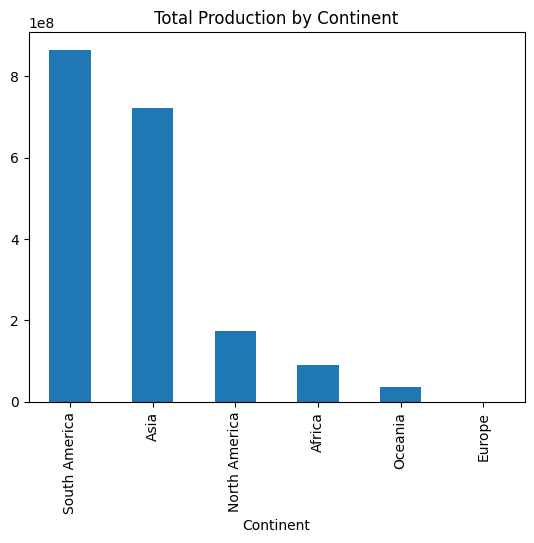

In [51]:
df.groupby('Continent')['Production_Tons'].sum().sort_values(ascending=False).plot(kind='bar',title='Total Production by Continent')
plt.show()

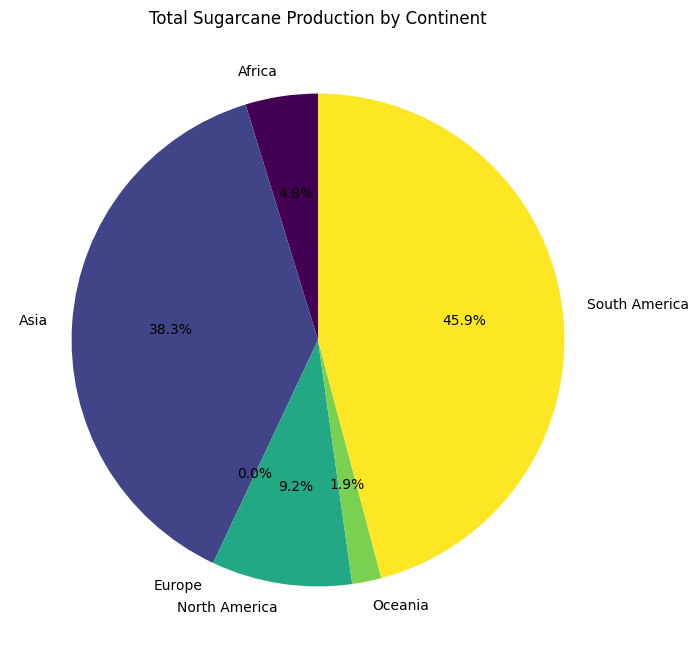

In [92]:
plt.figure(figsize=(8, 8))
df_continent['Production_Tons'].plot(kind='pie', autopct='%.1f%%', startangle=90, colormap='viridis')
plt.title('Total Sugarcane Production by Continent')
plt.ylabel('') # Remove default y-label
plt.show()

In [73]:
df_continent.columns

Index(['Production_Tons', 'Production_per_Person_Kg', 'Acreage_Hectare',
       'Yield_Kg_Hectare', 'number_of_countries'],
      dtype='object')

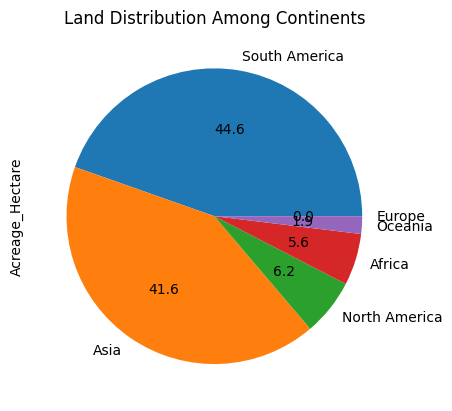

In [84]:
## LAND DISTRIBUTION AMONG CONTINENTS
df_continent['Acreage_Hectare'].sort_values(ascending=False).plot(kind='pie',autopct='%.1f')
plt.title('Land Distribution Among Continents')
plt.show()

South America and Asia have the largest share of land in the world therefore they are also the leading in the production of sugarcane in the world.

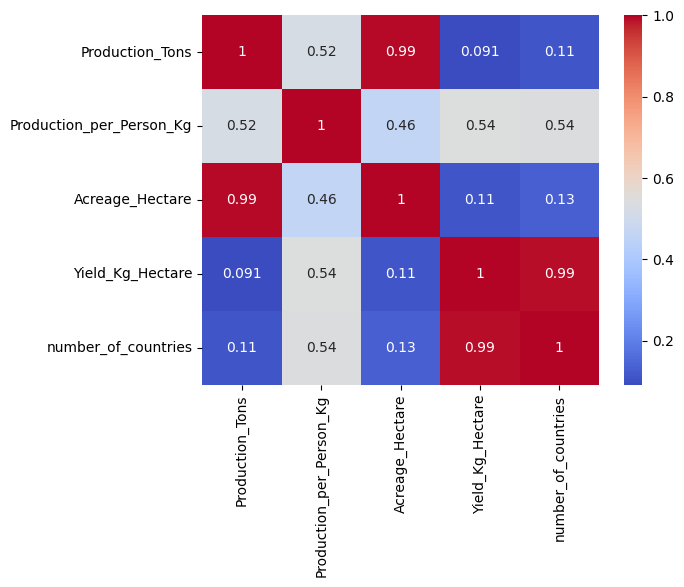

In [85]:
sns.heatmap(df_continent.corr(),annot=True,cmap='coolwarm')
plt.show()

There is very strong positive correlation(0.99) between the Production_Tons and Acreage which proves that more land implies more production

In [53]:
df.columns

Index(['Country', 'Continent', 'Production_Tons', 'Production_per_Person_Kg',
       'Acreage_Hectare', 'Yield_Kg_Hectare'],
      dtype='object')

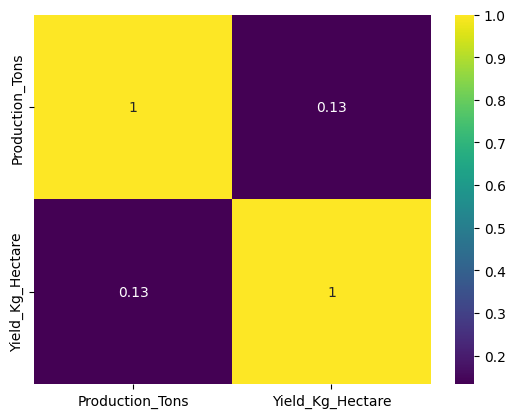

In [57]:
# DOES HIGHER PRODUCTION IMPLY HIGHER YIELDS?
df_corr=df[['Production_Tons', 'Yield_Kg_Hectare']].corr()
sns.heatmap(df_corr,annot=True,cmap='viridis')
plt.show()

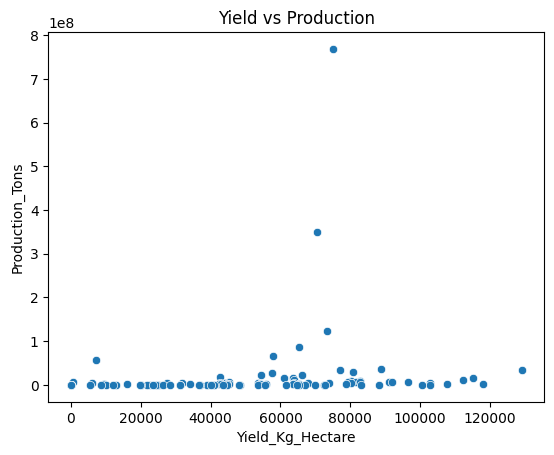

In [70]:
sns.scatterplot(data=df, x='Yield_Kg_Hectare', y='Production_Tons')
plt.title('Yield vs Production')
plt.show()


**There is not very strong correlation between the two indicating that higher production doesn't necessarily imply higher yield.**
**Yield and efficiency depends upon several other factors not just production**

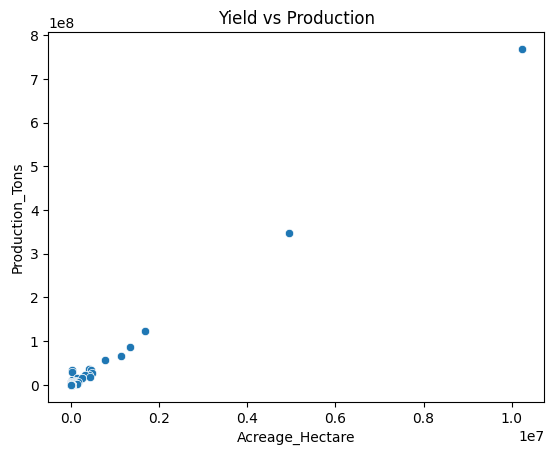

In [68]:
## DOES MORE LAND MEAN MORE PRODUCTION?
sns.scatterplot(data=df, x='Acreage_Hectare', y='Production_Tons')
plt.title('Yield vs Production')
plt.show()

**The Scatterplot shows a linear relationship indicating that higher land leads to higher levels of production.**

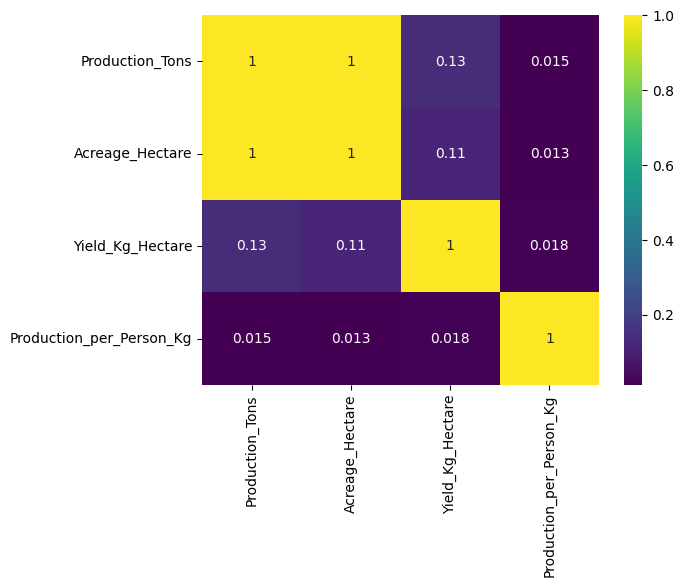

In [89]:
corr=df[['Production_Tons','Acreage_Hectare','Yield_Kg_Hectare','Production_per_Person_Kg']].corr()
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()